In [99]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [100]:
Data_path = r'D:\sudeep_work\nlp\data\village_carrier'

In [101]:
students = pd.read_csv(os.path.join(Data_path,"students.csv"), parse_dates = ['students_date_joined'])
professionals = pd.read_csv(os.path.join(Data_path,"professionals.csv"), parse_dates = ['professionals_date_joined'])
emails = pd.read_csv(os.path.join(Data_path,"emails.csv"), index_col = "emails_id")
questions = pd.read_csv(os.path.join(Data_path,"questions.csv"), index_col = "questions_id", parse_dates = ['questions_date_added'])
answers = pd.read_csv(os.path.join(Data_path,"answers.csv"), index_col = "answers_id", parse_dates = ["answers_date_added"])
tag_questions = pd.read_csv(os.path.join(Data_path,"tag_questions.csv"))
tags = pd.read_csv(os.path.join(Data_path,"tags.csv"))
matches = pd.read_csv(os.path.join(Data_path,"matches.csv"))

# Exploratory data analysis

student_analysis

In [6]:
print(students.shape)
print(students.head())
print(students.info())
# students.students_id.nunique()
# 

(30971, 2)
                                 students_location students_date_joined
students_id                                                            
12a89e96755a4dba83ff03e03043d9c0               NaN  2011-12-16 14:19:24
e37a5990fe354c60be5e87376b08d5e3               NaN  2011-12-27 03:02:44
12b402cceeda43dcb6e12ef9f2d221ea               NaN  2012-01-01 05:00:00
a0f431fc79794edcb104f68ce55ab897               NaN  2012-01-01 05:00:00
23aea4702d804bd88d1e9fb28074a1b4               NaN  2012-01-01 05:00:00
<class 'pandas.core.frame.DataFrame'>
Index: 30971 entries, 12a89e96755a4dba83ff03e03043d9c0 to 1de9d7d0329e40e6996bbc92d13c6a00
Data columns (total 2 columns):
students_location       28938 non-null object
students_date_joined    30971 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 725.9+ KB
None


In [34]:
students_locations = students.students_location.value_counts().sort_values(ascending = False).head(20)
students_locations

New York, New York             1313
Bengaluru, Karnataka, India     890
Los Angeles, California         663
Hyderabad, Telangana, India     597
Boston, Massachusetts           557
San Francisco, California       550
San Jose, California            548
Houston, Texas                  476
Chennai, Tamil Nadu, India      437
Chicago, Illinois               344
Oakland, California             261
San Antonio, Texas              202
Dallas, Texas                   197
Owensboro, Kentucky             196
Providence, Rhode Island        187
Lakeland, Florida               177
Pittsburgh, Pennsylvania        170
Irving, Texas                   166
Miami, Florida                  161
Atlanta, Georgia                160
Name: students_location, dtype: int64

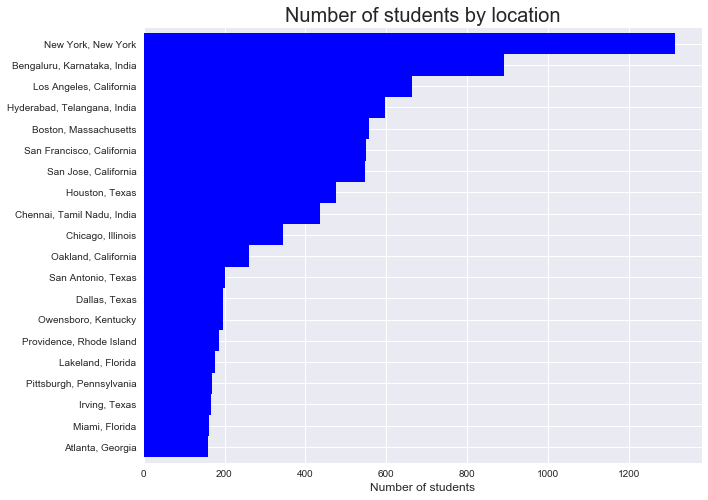

In [36]:
students_locations.sort_values(ascending = True).plot.barh(figsize = (10,8), color = 'b', width =1)
plt.title("Number of students by location", fontsize=20)
plt.xlabel('Number of students', fontsize=12)
plt.show()

In [37]:
students.students_location.isna().sum()

2033

professional analysis

In [38]:
print(professionals.shape)
print(professionals.head())
print(professionals.info())

(28152, 4)
                                 professionals_location  \
professionals_id                                          
9ced4ce7519049c0944147afb75a8ce3                    NaN   
f718dcf6d2ec4cb0a52a9db59d7f9e67                    NaN   
0c673e046d824ec0ad0ebe012a0673e4     New York, New York   
977428d851b24183b223be0eb8619a8c  Boston, Massachusetts   
e2d57e5041a44f489288397c9904c2b2                    NaN   

                                 professionals_industry  \
professionals_id                                          
9ced4ce7519049c0944147afb75a8ce3                    NaN   
f718dcf6d2ec4cb0a52a9db59d7f9e67                    NaN   
0c673e046d824ec0ad0ebe012a0673e4                    NaN   
977428d851b24183b223be0eb8619a8c                    NaN   
e2d57e5041a44f489288397c9904c2b2                    NaN   

                                 professionals_headline  \
professionals_id                                          
9ced4ce7519049c0944147afb75a8ce3           

In [44]:
professionals_locations = professionals.professionals_location.value_counts().sort_values(ascending= False).head(20)
print(professionals_locations)
professionals_industry = professionals.professionals_industry.value_counts().sort_values(ascending= False).head(20)
print(professionals_industry)

New York, New York             1337
California, California          864
Greater New York City Area      745
Boston, Massachusetts           714
Los Angeles, California         617
Atlanta, Georgia                578
Chicago, Illinois               576
Austin, Texas                   574
Houston, Texas                  556
San Francisco Bay Area          513
San Francisco, California       425
Philadelphia, Pennsylvania      394
Bengaluru, Karnataka, India     394
Greater Atlanta Area            383
Dallas/Fort Worth Area          368
Greater Los Angeles Area        364
Washington                      318
Greater Chicago Area            298
Houston, Texas Area             282
Greater Boston Area             280
Name: professionals_location, dtype: int64
Telecommunications                      3166
Information Technology and Services     2109
Computer Software                       1272
Hospital and Health Care                 862
Higher Education                         800
Accounting  

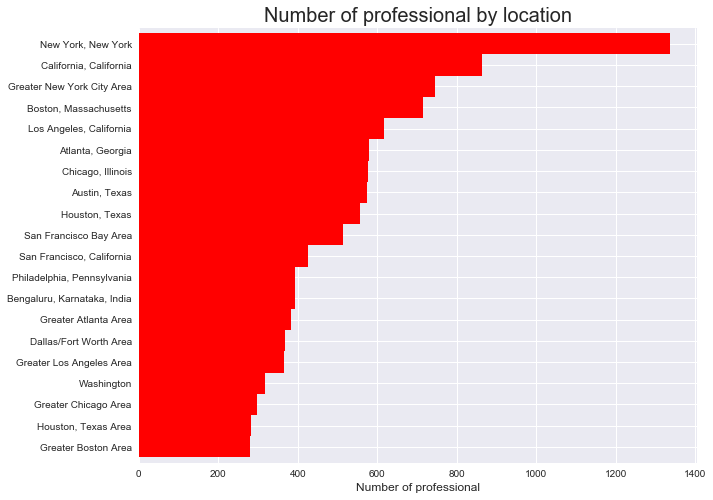

2033


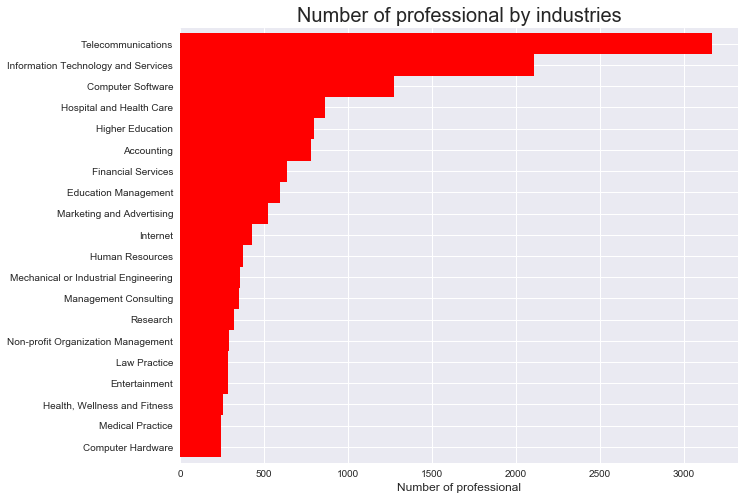

2576


In [47]:
professionals_locations.sort_values(ascending = True).plot.barh(figsize = (10,8),color = 'r', width = 1)
plt.title("Number of professional by location", fontsize=20)
plt.xlabel('Number of professional', fontsize = 12)
plt.show()

print(students.students_location.isna().sum())

professionals_industry.sort_values(ascending = True).plot.barh(figsize = (10,8),color = 'r', width = 1)
plt.title("Number of professional by industries", fontsize=20)
plt.xlabel('Number of professional', fontsize = 12)
plt.show()
print(professionals.professionals_industry.isna().sum())

In [49]:
professionals.professionals_headline.sample(20)

professionals_id
590e250afdc84073b0727038b7dbb559    Founder | Chief Executive Officer at m.i.n.d. ...
fff86d822ca246b796bd960756298da3                                                    .
6cb8eb7af66843269787c8d13d7aeb03    Adaptive business-minded Swiss Army knife that...
b1488415466948b5bee3896efbc31fdd    Over 20 years of creative and outgoing music i...
98407241db8c49dba542d039acef1ed7                 Executive Recruiter and Career Coach
33c153156f944bdbb5f14fb5fa5b990f                                 Tax Associate at PwC
e667089609d6476ca281cd59d86cf1b5                   Client Solutions Executive at AT&T
190bebebf83e4902af553a509ffc977e    Growth Hacker, Business Analyst at CareerGuide...
707f16118ec04a39a3da28f15a74cea7              Process Improvement Analyst II / LSS GB
85449e6015584dda802ddc54cfe600d5                                    Solutions Manager
de6fccba6bc94e888961b7730a345203                                                   --
8b85d48f924341a9af30d534037d79c5     

questions analysis

In [50]:
print(questions.shape)
print(questions.head())
print(questions.info())

(23931, 4)
                                               questions_author_id  \
questions_id                                                         
332a511f1569444485cf7a7a556a5e54  8f6f374ffd834d258ab69d376dd998f5   
eb80205482e4424cad8f16bc25aa2d9c  acccbda28edd4362ab03fb8b6fd2d67b   
4ec31632938a40b98909416bdd0decff  f2c179a563024ccc927399ce529094b5   
2f6a9a99d9b24e5baa50d40d0ba50a75  2c30ffba444e40eabb4583b55233a5a4   
5af8880460c141dbb02971a1a8369529  aa9eb1a2ab184ebbb00dc01ab663428a   

                                 questions_date_added  \
questions_id                                            
332a511f1569444485cf7a7a556a5e54  2016-04-26 11:14:26   
eb80205482e4424cad8f16bc25aa2d9c  2016-05-20 16:48:25   
4ec31632938a40b98909416bdd0decff  2017-02-08 19:13:38   
2f6a9a99d9b24e5baa50d40d0ba50a75  2017-09-01 14:05:32   
5af8880460c141dbb02971a1a8369529  2017-09-01 02:36:54   

                                                                    questions_title  \
questions_i

In [52]:
questions.questions_author_id.nunique()

12329

answers analysis

In [53]:
print(answers.shape)
print(answers.head())
print(answers.info())

(51123, 4)
                                                 answers_author_id  \
answers_id                                                           
4e5f01128cae4f6d8fd697cec5dca60c  36ff3b3666df400f956f8335cf53e09e   
ada720538c014e9b8a6dceed09385ee3  2aa47af241bf42a4b874c453f0381bd4   
eaa66ef919bc408ab5296237440e323f  cbd8f30613a849bf918aed5c010340be   
1a6b3749d391486c9e371fbd1e605014  7e72a630c303442ba92ff00e8ea451df   
5229c514000446d582050f89ebd4e184  17802d94699140b0a0d2995f30c034c6   

                                               answers_question_id  \
answers_id                                                           
4e5f01128cae4f6d8fd697cec5dca60c  332a511f1569444485cf7a7a556a5e54   
ada720538c014e9b8a6dceed09385ee3  eb80205482e4424cad8f16bc25aa2d9c   
eaa66ef919bc408ab5296237440e323f  eb80205482e4424cad8f16bc25aa2d9c   
1a6b3749d391486c9e371fbd1e605014  4ec31632938a40b98909416bdd0decff   
5229c514000446d582050f89ebd4e184  2f6a9a99d9b24e5baa50d40d0ba50a75   

       

In [54]:
answers.answers_author_id.nunique()


10169

In [55]:
answers.answers_question_id.nunique()


23110

Questions tags

In [56]:
tag_questions.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [57]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


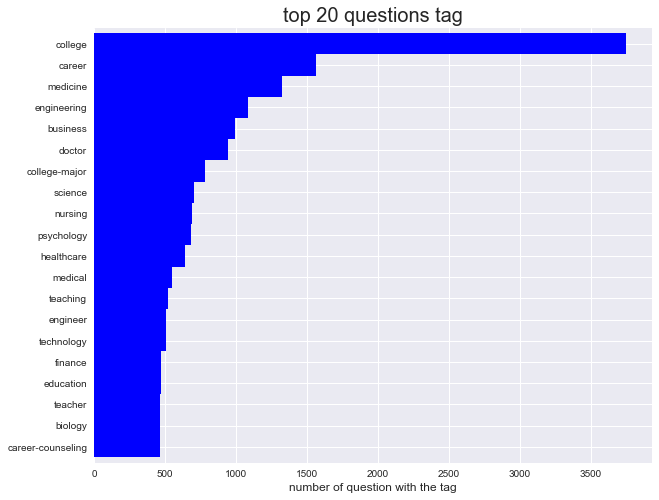

In [64]:
tag_questions = tag_questions.merge(right = tags, how = 'left', left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
tag_questions_groups = tag_questions.tags_tag_name.value_counts().sort_values(ascending = False).head(20)
tag_questions_groups.sort_values(ascending = True).plot.barh(figsize = (10,8), color = 'b', width = 1)
plt.title('top 20 questions tag',fontsize = 20)
plt.xlabel('number of question with the tag', fontsize = 12)
plt.show()

emails

In [65]:
print(emails.shape)
print(emails.head())
print(emails.info())

(1850101, 3)
                        emails_recipient_id              emails_date_sent  \
emails_id                                                                   
2337714    0c673e046d824ec0ad0ebe012a0673e4  2018-12-07 01:05:40 UTC+0000   
2336077    0c673e046d824ec0ad0ebe012a0673e4  2018-12-06 01:14:15 UTC+0000   
2314660    0c673e046d824ec0ad0ebe012a0673e4  2018-11-17 00:38:27 UTC+0000   
2312639    0c673e046d824ec0ad0ebe012a0673e4  2018-11-16 00:32:19 UTC+0000   
2299700    0c673e046d824ec0ad0ebe012a0673e4  2018-11-08 00:16:40 UTC+0000   

             emails_frequency_level  
emails_id                            
2337714    email_notification_daily  
2336077    email_notification_daily  
2314660    email_notification_daily  
2312639    email_notification_daily  
2299700    email_notification_daily  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850101 entries, 2337714 to 2409773
Data columns (total 3 columns):
emails_recipient_id       object
emails_date_sent          obje

In [66]:
emails.emails_recipient_id.nunique()

22168

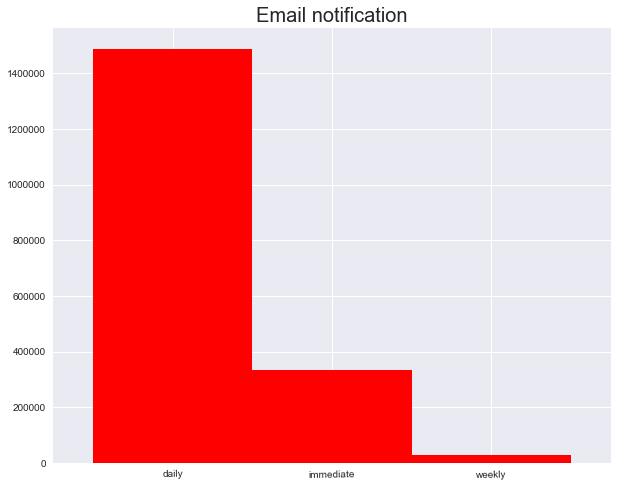

In [67]:
emails.emails_frequency_level.replace(["email_notification_daily", "email_notification_immediate", "email_notification_weekly"], ["daily", "immediate", "weekly"],inplace = True)
email_nots = emails.emails_frequency_level.value_counts()
ax = plt.figure()
ax = email_nots.plot.bar(figsize = (10, 8),color = 'r', width = 1, rot  = 1)
plt.title('Email notification', fontsize = 20)
plt.show()


matches

In [68]:
print(matches.shape)
print(matches.head())


(4316275, 2)
   matches_email_id               matches_question_id
0           1721939  332a511f1569444485cf7a7a556a5e54
1           1665388  332a511f1569444485cf7a7a556a5e54
2           1636634  332a511f1569444485cf7a7a556a5e54
3           1635498  332a511f1569444485cf7a7a556a5e54
4           1620298  332a511f1569444485cf7a7a556a5e54


In [69]:
matches.rename(columns={'matches_email_id': 'emails_id'}, inplace=True)
matches = pd.merge(matches, emails['emails_frequency_level'].reset_index(), on="emails_id", how="left")
matches.head()

,emails_id,matches_question_id,emails_frequency_level
0,1721939,332a511f1569444485cf7a7a556a5e54,daily
1,1665388,332a511f1569444485cf7a7a556a5e54,daily
2,1636634,332a511f1569444485cf7a7a556a5e54,daily
3,1635498,332a511f1569444485cf7a7a556a5e54,daily
4,1620298,332a511f1569444485cf7a7a556a5e54,daily


In [70]:
print(matches[matches.emails_frequency_level == "daily"].shape[0], "questions were asked in daily emails")
print(matches[matches.emails_frequency_level == "immediate"].shape[0], "questions were asked in immediate emails")
print(matches[matches.emails_frequency_level == "weekly"].shape[0], "questions were asked in weekly emails")

3655450 questions were asked in daily emails
322193 questions were asked in immediate emails
338632 questions were asked in weekly emails


In [83]:
group_memberships = pd.read_csv(os.path.join(Data_path,"group_memberships.csv"))
groups = pd.read_csv(os.path.join(Data_path,"groups.csv"))
school_memberships = pd.read_csv(os.path.join(Data_path,"school_memberships.csv"))
comments = pd.read_csv(os.path.join(Data_path,"comments.csv"))

group_memberships

In [84]:
print(group_memberships.shape)
print(group_memberships.head())
print(group_memberships.info())

(1038, 2)
         group_memberships_group_id         group_memberships_user_id
0  eabbdf4029734c848a9da20779637d03  9a5aead62c344207b2624dba90985dc5
1  eabbdf4029734c848a9da20779637d03  ea7122da1c7b4244a2184a4f9f944053
2  eabbdf4029734c848a9da20779637d03  cba603f34acb4a40b3ccb53fe6681b5d
3  eabbdf4029734c848a9da20779637d03  fa9a126e63714641ae0145557a390cab
4  eabbdf4029734c848a9da20779637d03  299da113c5d1420ab525106c242c9429
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 2 columns):
group_memberships_group_id    1038 non-null object
group_memberships_user_id     1038 non-null object
dtypes: object(2)
memory usage: 16.3+ KB
None


In [85]:
print(groups.shape)
print(groups.head())
print(groups.info())

(49, 2)
                          groups_id groups_group_type
0  eabbdf4029734c848a9da20779637d03     youth program
1  7080bf8dcf78463bb03e6863887fd715     youth program
2  bc6fc50a2b444efc8ec47111b290ffb8     youth program
3  37f002e8d5e442ca8e36e972eaa55882     youth program
4  52419ff84d4b47bebd0b0a6c1263c296     youth program
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
groups_id            49 non-null object
groups_group_type    49 non-null object
dtypes: object(2)
memory usage: 864.0+ bytes
None


In [87]:
group_memberships.rename(columns={'group_memberships_group_id': 'groups_id'}, inplace=True)
# group_memberships = pd.merge(group_memberships,groups, how = 'inner')
# group_memberships.head()

In [90]:
group_memberships

,groups_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429
5,7080bf8dcf78463bb03e6863887fd715,836a747118d6436caf56ff3a3c47289a
6,7080bf8dcf78463bb03e6863887fd715,82cf96ae74fa4b3a8ffd8a74446c08ca
7,7080bf8dcf78463bb03e6863887fd715,b0f6c44506444fb99e910dcc5836b5d8
8,bc6fc50a2b444efc8ec47111b290ffb8,ab8d405cfdab4faf83ffe7f83944a87b
9,bc6fc50a2b444efc8ec47111b290ffb8,370dba85f183496186772be0c53a69b1


In [91]:
group_membership = pd.merge(group_memberships,groups, how = 'inner')


In [93]:
group_membership.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 3 columns):
groups_id                    1038 non-null object
group_memberships_user_id    1038 non-null object
groups_group_type            1038 non-null object
dtypes: object(3)
memory usage: 32.4+ KB


In [94]:
group_membership.groups_group_type.value_counts().sort_values(ascending = False)

youth program           653
cause                   232
professional network     92
club                     22
mentorship program       22
interest group           13
competition               4
Name: groups_group_type, dtype: int64

all_user

In [106]:
students.head()
students.rename(columns={'students_id': 'user_id'}, inplace=True)

In [118]:
students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
user_id                 30971 non-null object
students_location       28938 non-null object
students_date_joined    30971 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 726.0+ KB


In [110]:
professionals.rename(columns={'professionals_id': 'user_id'}, inplace=True)

In [119]:
professionals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28152 entries, 0 to 28151
Data columns (total 5 columns):
user_id                      28152 non-null object
professionals_location       25054 non-null object
professionals_industry       25576 non-null object
professionals_headline       26085 non-null object
professionals_date_joined    28152 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


In [116]:
all_user_id = pd.DataFrame(pd.concat([students['user_id'], professionals['user_id']],ignore_index = False))
all_user_id.head()

,user_id
0,12a89e96755a4dba83ff03e03043d9c0
1,e37a5990fe354c60be5e87376b08d5e3
2,12b402cceeda43dcb6e12ef9f2d221ea
3,a0f431fc79794edcb104f68ce55ab897
4,23aea4702d804bd88d1e9fb28074a1b4


In [117]:
all_user_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59123 entries, 0 to 28151
Data columns (total 1 columns):
user_id    59123 non-null object
dtypes: object(1)
memory usage: 923.8+ KB
